# Gradient Descent Method

## Definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt


- We want to minimize this function using the Gradient Descent Method

\begin{equation}
f(\mathbf{x}) = 0.5 \left( x_1 - 4.5 \right)^2 + 2.5 \left( x_2 - 2.3 \right)^2\end{equation}

- The gradient of this function is given by:\begin{equation}
\nabla f(\mathbf{x}) = \begin{bmatrix} \displaystyle \frac{\partial f}{\partial x_1} \\ \displaystyle\frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} x_1 - 4.5 \\ 5 \left( x_2 - 2.3 \right) \end{bmatrix}
\end{equation}

- Define two functions. 

    - One that given a point $\mathbf{x}$, if computes $f(x)$:

    - One that given a point $\mathbf{x}$, if computes $\nabla f(\mathbf{x})$


In [2]:
def f(x):
    '''Objective function'''
    return 0.5*(x[0] - 4.5)**2 + 2.5*(x[1] - 2.3)**2

def df(x):
    '''Gradient of the objective function'''
    return np.array([x[0] - 4.5, 5*(x[1] - 2.3)])

- Compute the minimum of this function using the `scipy` library [SciPy](https://scipy.org/) with the `minimize` method [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

    - Pass np.zeros(2) as `x0`and use `method='trust-constr'`
 
```python
# Expected Output: array([4.5, 2.3])

In [3]:
from scipy.optimize import minimize

result = minimize(
    f, np.zeros(2), method='trust-constr', jac=df)

result.x

array([4.5, 2.3])

- Plot the objective function and its minimizer. Rum the following code. Does it agree with the previous result?

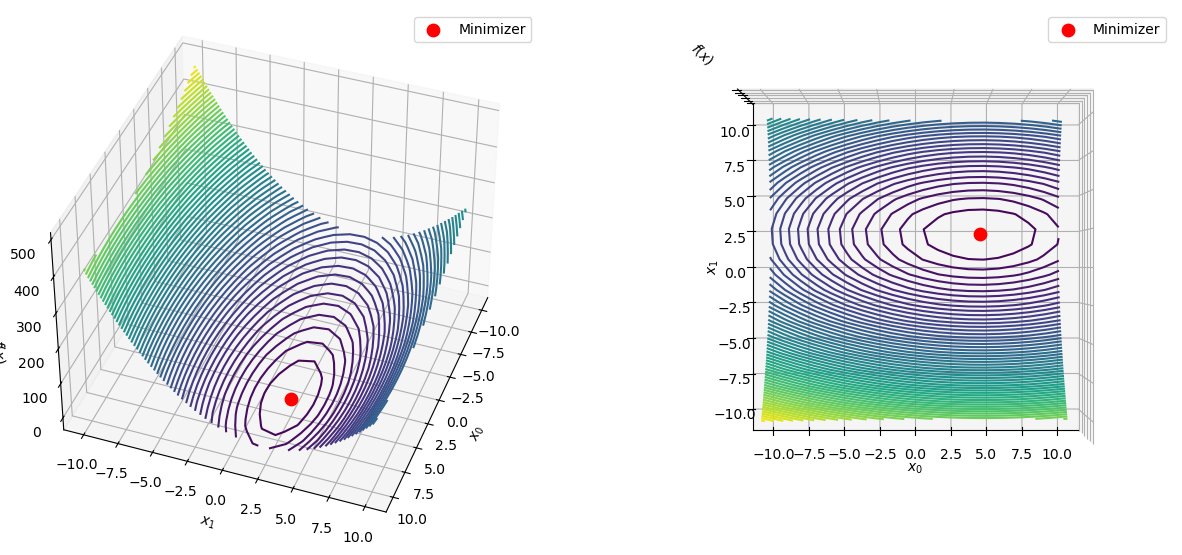

In [4]:
# Generate mesh grid for the function visualization
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_values = f(np.array([X_grid, Y_grid]))

# Extract minimizer coordinates
opt_x0, opt_x1 = np.meshgrid(result.x[0], result.x[1])
opt_z = f(np.stack([opt_x0, opt_x1]))

# Initialize figure
fig = plt.figure(figsize=(15, 20))

# First 3D contour plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.contour3D(X_grid, Y_grid, Z_values, levels=60, cmap='viridis')
ax1.scatter(opt_x0, opt_x1, opt_z, color='red', s=80, label='Minimizer')
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax1.set_zlabel('$f(x)$')
ax1.view_init(elev=40, azim=20)
ax1.legend()

# Second 3D contour plot (Top-down view)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.contour3D(X_grid, Y_grid, Z_values, levels=60, cmap='viridis')
ax2.scatter(opt_x0, opt_x1, opt_z, color='red', s=80, label='Minimizer')
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')
ax2.set_zlabel('$f(x)$')
ax2.axes.zaxis.set_ticklabels([])
ax2.view_init(elev=90, azim=-90)  # Top-down view
ax2.legend()

plt.show()


## Steepest Descent

- Given an initial point $\mathbf{x}_0$, the method follows the update rule:
\begin{equation}
        \mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k,
\end{equation}

- $\mathbf{p}_k$: Search direction.
- $\alpha_k > 0$: Step length.
    
    
For each iteration $k$, the objective is to compute acceptable $\mathbf{p}_k$ and $\alpha_k > 0$ that satisfies certain standard conditions.


**The Algorithm**

We can now outline the necessary steps for the **steepest descent method**:

- Select a starting point $x=x_0$.
- Choose a maximum number of iterations $M$.
- Set a tolerance `tol` close to zero to evaluate the gradient.
- Initialize the step counter $k$.

- Iterative Process (repeat in a loop)
   1. Compute the next point: $ \mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$
   2. Evaluate the new gradient:$ \nabla f(\mathbf{x})$
   4. Increment the step counter: $k=k+1$.
   5. Check for stopping conditions:
      - If the gradient norm is sufficiently small: $|\nabla f(\mathbf{x})| < TOL$
      - OR if the maximum number of iterations is reached: $k = M$, then exit the loop.
    6. **Return** the minimum $\mathbf{x}^*$.


In [5]:
def steepest_descent(gradient, x0=np.zeros(2), alpha=0.01, max_iter=10000, tolerance=1e-10): 
    '''
    Steepest descent with a fixed step size.

    Args:
      - gradient: Function computing the gradient of the objective.
      - x0: Initial guess for (x_0, x_1) (default: zeros) <numpy.ndarray>.
      - alpha: Step size parameter (default: 0.01).
      - max_iter: Maximum number of iterations (default: 10,000).
      - tolerance: Convergence criterion based on gradient norm (default: 1e-10).

    Returns:
      - results: <numpy.ndarray> of shape (n_iter, 2) with (x_0, x_1) at each step.
      - num_steps: <int> Total number of iterations performed.
    '''

    # Initialize the array to store iterations
    results = np.array([])

    # Compute initial gradient
    grad_val = gradient(x0)

    # Initialize step counter
    num_steps = 0

    # Set initial point
    x = x0
    results = np.append(results, x, axis=0)

    # Iterate until convergence or max iterations reached
    while any(abs(grad_val) > tolerance) and num_steps < max_iter:

        # Move in the direction of the negative gradient
        x = x - alpha * grad_val

        # Store new point
        results = np.append(results, x, axis=0)

        # Compute new gradient
        grad_val = gradient(x)

        # Increment step counter
        num_steps += 1

    # Reshape results for correct output format
    return results.reshape(-1, 2), num_steps


Call this function to minimize $f(\mathbf{x})$

```python

# Expected Output: 
# Optimal solution: [4.5 2.3]
# Total iterations: 72

In [6]:
# Perform steepest descent optimization
trajectory, num_iterations = steepest_descent(
    df, x0=np.array([-9, -9]), alpha=0.30
)

# Extract the final minimizer
optimal_point = trajectory[-1].round(1)

# Display the results
print('- Optimal solution:', optimal_point)
print('- Total iterations:', num_iterations)


- Optimal solution: [4.5 2.3]
- Total iterations: 72


- Here there is a function to plot the trajectory.

In [7]:
def plot_optimization_trajectory(trajectory, num_iterations, objective_function):
    """
    Plots the optimization trajectory on a 3D surface plot with the objective function contours.
    
    Args:
        - trajectory: <numpy.ndarray> of size (n_iter, 2) with x_0 and x_1 values at each iteration
        - num_iterations: <int> the total number of iterations performed
        - objective_function: function to calculate the objective value, takes a 2D array as input
    """
    # Create a meshgrid for X and Y values for the plot
    X, Y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))

    # Calculate Z values (the objective function values)
    Z = objective_function(np.array([X, Y]))

    # Extract coordinates of iterates
    X_vals, Y_vals = trajectory[:, 0], trajectory[:, 1]
    Z_vals = objective_function(np.array([X_vals, Y_vals]))

    # Create figure
    fig = plt.figure(figsize=(20, 20))

    # First 3D plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.contour3D(X, Y, Z, levels=60, cmap='viridis')
    ax1.plot(X_vals, Y_vals, Z_vals, color='red', linewidth=3)
    ax1.scatter(trajectory[-1, 0], trajectory[-1, 1], objective_function(trajectory[-1]), marker='o', color='red', s=100)
    ax1.set_xlabel('$x_0$')
    ax1.set_ylabel('$x_1$')
    ax1.set_zlabel('$f(x)$')
    ax1.view_init(elev=20, azim=20)

    # Second 3D plot
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.contour3D(X, Y, Z, levels=60, cmap='viridis')
    ax2.plot(X_vals, Y_vals, Z_vals, color='red', linewidth=3)
    ax2.scatter(trajectory[-1, 0], trajectory[-1, 1], objective_function(trajectory[-1]), marker='o', color='red', s=100)
    ax2.set_xlabel('$x_0$')
    ax2.set_ylabel('$x_1$')
    ax2.set_zlabel('$f(x)$')
    ax2.axes.zaxis.set_ticklabels([])
    ax2.view_init(elev=90, azim=-90)

    plt.show()


- Plot the trajectory by calling this function

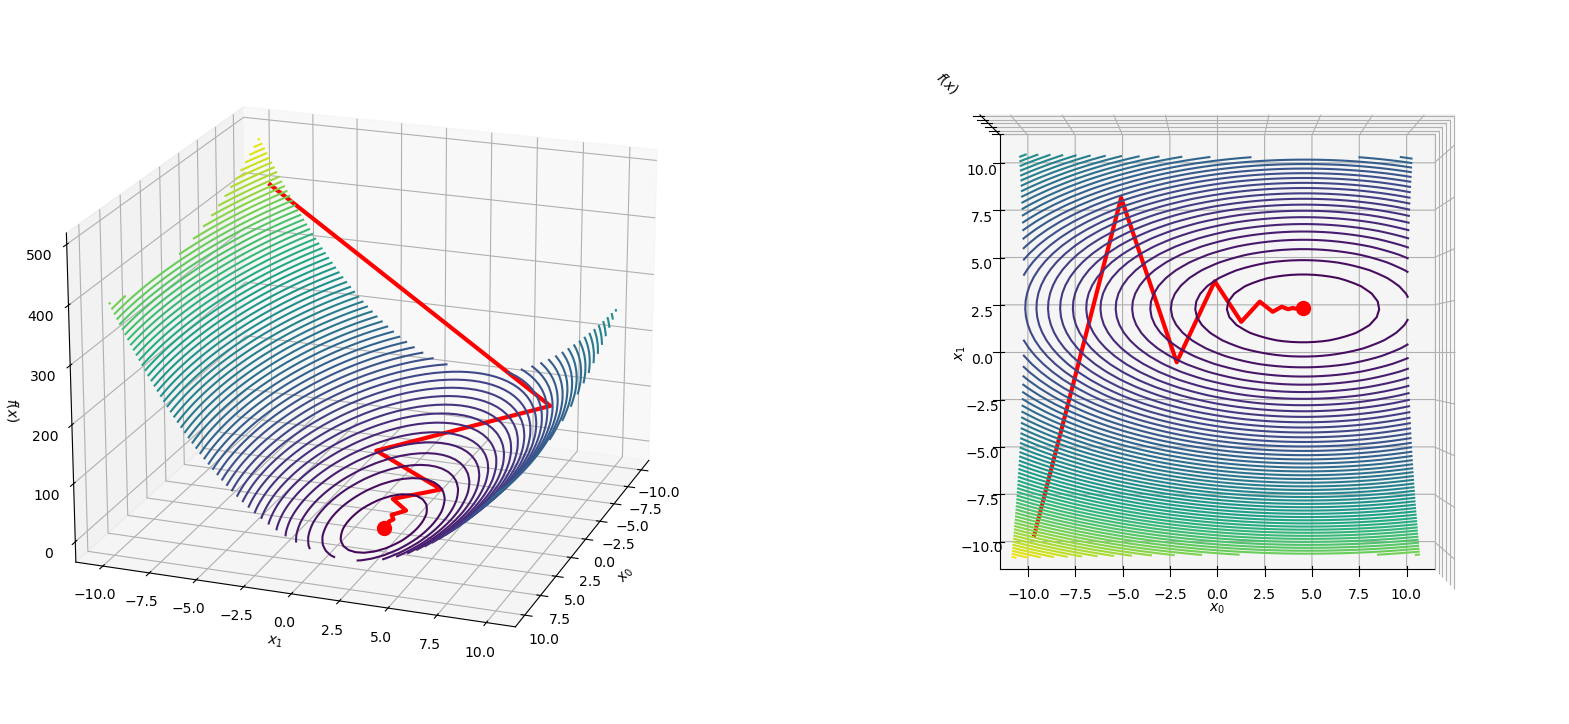

In [8]:
# Call the function to plot the results
plot_optimization_trajectory(trajectory, num_iterations, f)

- Try new starting points and change the learning rate and analyze what is happening.

- Include the Armijo condition to calculate the step length.